#Notebook KNN4: Bilderkennung

Wir wollen nun ein KNN konstruieren, welches handgeschriebene Ziffern erkennen soll. 
Sie werden sehen, wie einfach es ist, Ihr eigenes künstliches neuronales Netz zu definieren und trainieren zu lassen.


Hierbei verwenden wir den MNIST-Datensatz (Modified National Institute of Standards and Technology Database). Dieser Datensatz betseht aus handgeschriebenen Ziffern von Mitarbeitern des American Census Bureau (Volkszählungsbehörde in den USA) sowie von amerikanischen High School-Schülern. https://en.wikipedia.org/wiki/MNIST_database

Wir teilen die Daten in Trainingsdaten und Testdaten auf.
Das KNN soll nur mittels der Trainingsdaten lernen und anschließend überprüfen wir mit den Testdaten die Genauigkeit unseres Modells.

Aktivieren Sie die folgende Zelle, um die nötigen Programmpakete und die Daten zu laden. Ignorieren Sie hierbei die im Code aufgeführten Befehle. Den Code aller weiteren Zellen werden Sie verstehen.



In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from matplotlib import pyplot as plt
from random import randint
  
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
  # siehe https://colab.research.google.com/drive/1U0sRZdxVUn8LbQN9KidMaomKt2MPJ2-o#forceEdit=true&offline=true&sandboxMode=true&scrollTo=XaR6ncOmHNNw
  #from keras.datasets import mnist
  #(x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist = input_data.read_data_sets("MNIST_data/")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
  
  #progress bar: https://stackoverflow.com/questions/39124676/show-progress-bar-for-each-epoch-during-batchwise-training-in-keras/39192224
  
x_train = 255*train_data.reshape(len(train_data),28,28).astype('float32')
x_test = 255*eval_data.reshape(len(eval_data),28,28).astype('float32')
y_train = train_labels
y_test = eval_labels
  
  

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.


Using TensorFlow backend.


Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#Der MNIST-Datensatz


Die folgenden Befehle zeigen uns an, wie viele Bilder in "x_train" und "x_test" gespeichert sind:



In [2]:
print("Anzahl der Trainingsdaten: " + str(len(x_train)))
print("Anzahl der Testdaten: " + str(len(x_test)))

Anzahl der Trainingsdaten: 55000
Anzahl der Testdaten: 10000


Jedes einzelne Bild besteht aus 28 x 28 Pixeln. 

Wir lassen uns das 90ste Bild anzeigen, indem wir x_train[89] aufrufen. (Die Zählung beginnt bei 0, d.h. x_train[0] ist das erste Bild.)

Der Wert 0 steht hierbei für "weiß", der Wert 255 für "schwarz" und alle Werte dazwischen sind entsprechende Grautöne.

In [3]:
print("Ein Bild: \n" + str(x_train[89]))

Ein Bild: 
[[  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.       ]
 [  0.          0.          0.  

Wir können uns das 28*28-Pixel-Bild mit folgendem Befehl zeigen lassen:

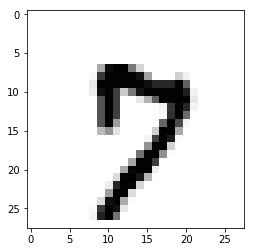

In [4]:
plt.imshow(x_train[89], cmap='Greys')
plt.show()

Können Sie erraten, was der folgende Befehl macht, bevor Sie ihn ausführen?

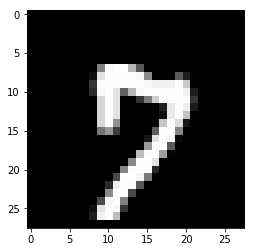

In [5]:
plt.imshow(255-x_train[89], cmap='Greys')
plt.show()


Wir lassen uns 25 zufällige Bilder aus x_train anzeigen:

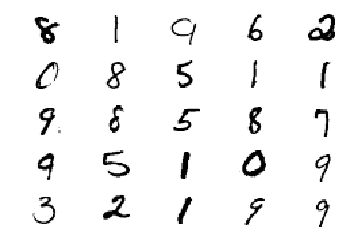

In [6]:

for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(x_train[randint(0, len(x_train))], cmap='Greys') 
plt.show()


In "y_train" und "y_test" befinden sich die zu erlerndenden Werte, nämlich die entsprechenden Ziffern. Sie sehen, dass es gar nicht so einfach ist, die korrekte Ziffer zu erkennen. 

Trainingsbild Nr. 1: 


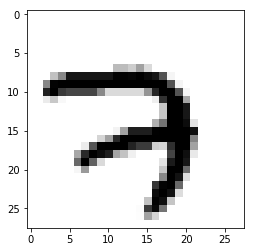

Ziffer von Bild Nr. 1: 7


In [7]:
print("Trainingsbild Nr. 1: ")
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print("Ziffer von Bild Nr. 1: " + str(y_train[0]))

Wir schauen uns auch das erste Bild aus den Testdaten an:

Testbild Nr. 1: 


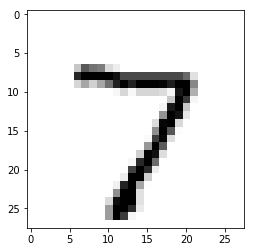

Ziffer von Bild Nr. 1: 7


In [8]:
print("Testbild Nr. 1: ")
plt.imshow(x_test[0], cmap='Greys')
plt.show()
print("Ziffer von Bild Nr. 1: " + str(y_test[0]))

#Modell Nr. 1


Die folgenden tensorflow-Befehle definieren ein neuronales Netz. Sie haben bereits das nötige Wissen, um alle Befehle nachvollziehen zu können!

Aktivieren Sie die nächste Zelle. In der Zusammenfassung wird die Anzahl der zu erlernenden Parameter aufgelistet. Können Sie die Zahlen nachvollziehen? (Denken Sie an zusätzliche Bias-Neuronen.)



**Lösung: **

In der ersten Schicht haben wir 784 (784 = 28*28) Input-Neuronen und ein Bias-Neuron.

Zudem gibt es eine verborgene Schicht mit 32 Neuronen und Sigmoid-Aktivierungsfunktion.
Dies ergibt 785 * 32  = 25120 Gewichte.

Das Output-Neuron ist mit den 32 Neuronen der verborgenen Schicht und einem Bias-Neuron verbunden. Es besitzt die lineare Aktivierungsfunktion.

Insgesamt haben wir also 25120 + 33 = 25153 Gewichte.

In [9]:
model1 = Sequential()
model1.add(Dense(units=32, activation='sigmoid', use_bias=True, input_shape=(784,)))
model1.add(Dense(units=1, use_bias=True, activation='linear'))
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


Wir trainieren nun unser KNN mittelse Gradientenverfahren und unserer üblichen Fehlerfunktion ('mean_squared_error').

Die Anzahl der Iterationen wird mit "epochs=500" festgelegt.

In jedem Schritt berechnen wir die Fehler nur für eine zufällig gewählte Menge von Daten.   Die Anzahl dieser Daten wird mit "batch_size=1000" festgelegt. (Das Optimierungsverfahren heißt aus diesem Grund "stochastisches Gradientenverfahren", was den Befehl  optimizer="sgd"  erklärt.)

In einer Graphik sehen wir die Prozentzahl der richtig zugeordneten Bilder, einmal für die Trainingsdaten, einmal für die Testdaten. Haben Sie für das Training etwas Geduld (5 Minuten bei epochs = 500?)

Instructions for updating:
Use tf.cast instead.


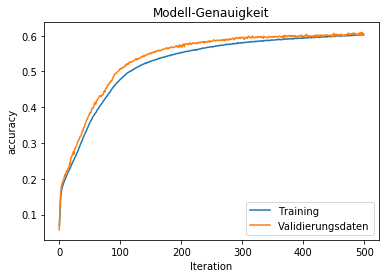

Test loss: 0.884
Test accuracy: 0.591
Test loss: 0.78
Test accuracy: 0.604


In [10]:

model1.compile(optimizer="sgd", loss='mean_squared_error', metrics=['accuracy'])
history = model1.fit(train_data, y_train, batch_size=1000, epochs=500, verbose=False, validation_split=.1)
loss, accuracy  = model1.evaluate(eval_data, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training', 'Validierungsdaten'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

loss2, accuracy2  = model1.evaluate(train_data, y_train, verbose=False)

print(f'Test loss: {loss2:.3}')
print(f'Test accuracy: {accuracy2:.3}')

Verändern Sie "Bild_Nummer" in der nächsten Zelle, um die Vorhersage unseres Modells für ausgewählte Bilder anzuzeigen.

Bild Nr. 60: 


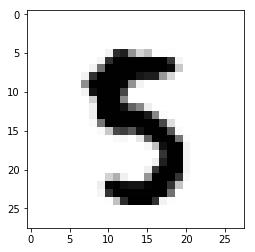

Ziffer von Bild Nr. 60: 5
Vorhersage für Bild Nr. 60: 3.0799668


In [11]:
Bild_nummer = 60
print("Bild Nr. " + str(Bild_nummer) + ": ")
plt.imshow(x_train[Bild_nummer], cmap='Greys')
plt.show()
print("Ziffer von Bild Nr. " + str(Bild_nummer) + ": " + str(y_train[Bild_nummer]))
Vorhersage = model1.predict(x_train[Bild_nummer].reshape(1, 784))[0][0]
print("Vorhersage für Bild Nr. " + str(Bild_nummer) + ": " + str(Vorhersage))




#Modell Nr. 2

Modell Nr. 1 besitzt folgendes Problem: Wird eine 4 fälschlicherweise als 5 vorhergesagt, beträgt der Fehler nur 1. Wird die 0 fälschlicherweise als 9 vorhergesagt, beträgt der Fehler 9. Also wird das KNN eher lernen, die kleinen von den großen Ziffern zu unterscheiden. Wir sollten also unsere Fehler-Funktion anpassen.

Hierzu transformieren wir die Daten y_train und y_test und speichern die neue Darstellung in y_train2 und y_test2.


In [0]:

y_train2 = keras.utils.to_categorical(y_train, 10)
y_test2 = keras.utils.to_categorical(y_test, 10)



An einem Beispiel sehen wir, wie die Ziffern nun dargestellt werden:

Bild Nr. 1: 


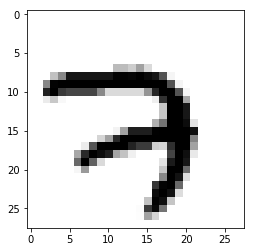

Ziffer von Bild Nr. 1 in y_train : 7
Ziffer von Bild Nr. 1 in y_train2: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
print("Bild Nr. 1: ")
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print("Ziffer von Bild Nr. 1 in y_train : " + str(y_train[0]))

print("Ziffer von Bild Nr. 1 in y_train2: " + str(y_train2[0]))

Wir konstruieren nun ein KNN mit 10 Output-Neuronen o_0, ...., o_9. Das Neuron mit dem höchsten Output-Wert zeigt uns unsere Vorhersage an. Erhalten wir also den Output [0.4, 0, 0, 0, 0, 7, 4.5, 0, 0, 0], so wird Ziffer 5 vorhergesagt.

Wählen wir nun die Fehler-Funktion 'mean_squared_error', so ist der Fehler zwischen 4 und 5, also zwischen [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] und [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] derselbe wie zwischen 0 und 9, also zwischen  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] und [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.].

In [0]:
model2 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model2.add(Dense(units=32, activation='sigmoid', use_bias=True, input_shape=(784,)))
model2.add(Dense(units=10, use_bias=True, activation='linear'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


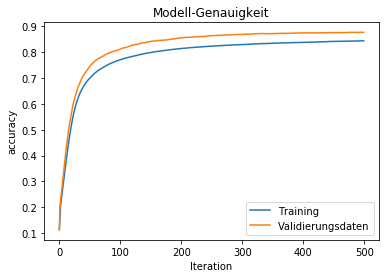

Test loss: 0.041
Test accuracy: 0.856
Test loss: 0.0419
Test accuracy: 0.848


In [0]:
model2.compile(optimizer="sgd", loss='mean_squared_error', metrics=['accuracy'])
#model2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(train_data, y_train2, batch_size=1000, epochs=500, verbose=False, validation_split=.1)
loss, accuracy  = model2.evaluate(eval_data, y_test2, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training', 'Validierungsdaten'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

loss2, accuracy2  = model2.evaluate(train_data, y_train2, verbose=False)

print(f'Test loss: {loss2:.3}')
print(f'Test accuracy: {accuracy2:.3}')

Bild Nr. 300: 


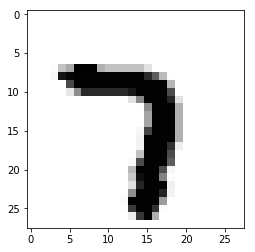

Ziffer von Bild Nr. 300: 7
Vorhersage für Bild Nr. 300: 7
Wahrscheinlichkeiten: [-0.50499016 -0.26917356  0.06222633  0.2969547  -0.07572271  0.01152735
  0.1215702   2.0030441   0.06144623 -0.2550996 ]


In [0]:
Bild_nummer = 300
print("Bild Nr. " + str(Bild_nummer) + ": ")
plt.imshow(x_train[Bild_nummer], cmap='Greys')
plt.show()
print("Ziffer von Bild Nr. " + str(Bild_nummer) + ": " + str(y_train[Bild_nummer]))
Vorhersage = model2.predict(x_train[Bild_nummer].reshape(1, 784))[0]
print("Vorhersage für Bild Nr. " + str(Bild_nummer) + ": " + str(np.argmax(Vorhersage)))

#Modell Nr. 3

Wir machen erneut denselben Ansatz wie in Modell 2 und ändern die Output-Aktivierungsfunktion von 'linear' zu 'softmax'.

In [0]:
model3 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model3.add(Dense(units=32, activation='sigmoid', use_bias=True, input_shape=(784,)))
model3.add(Dense(units=10, use_bias=True, activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Wir verändern zudem noch die Fehler-Funktion und wählen 'categorical_crossentropy', d.h. die sogenannte Kreuzentropie. Diese Funktion eignet sich besser bei diskreten Werten mit softmax (Klassifikation) im Vergleich zu kontinuierlichen.

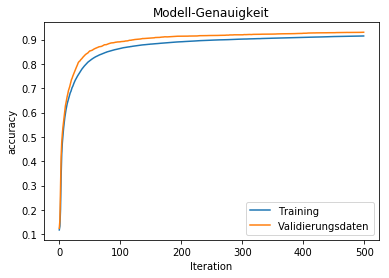

Test loss: 0.295
Test accuracy: 0.919
Test loss: 0.304
Test accuracy: 0.916


In [0]:
model3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(train_data, y_train2, batch_size=1000, epochs=500, verbose=False, validation_split=.1)
loss, accuracy  = model3.evaluate(eval_data, y_test2, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training', 'Validierungsdaten'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

loss2, accuracy2  = model3.evaluate(train_data, y_train2, verbose=False)

print(f'Test loss: {loss2:.3}')
print(f'Test accuracy: {accuracy2:.3}')

Sie können das Modell wieder an einzelnen Bildern testen:

Bild Nr. 38527: 


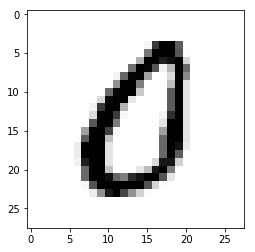

Ziffer von Bild Nr. 38527: 0
Vorhersage für Bild Nr. 38527: 0
Wahrscheinlichkeiten: [9.9063182e-01 1.1053518e-06 9.6454001e-05 4.8353355e-05 2.7753093e-05
 8.8563440e-03 2.4435503e-04 1.6712909e-05 6.5466644e-05 1.1674525e-05]


In [0]:
Bild_nummer = 38527
print("Bild Nr. " + str(Bild_nummer) + ": ")
plt.imshow(x_train[Bild_nummer], cmap='Greys')
plt.show()
print("Ziffer von Bild Nr. " + str(Bild_nummer) + ": " + str(y_train[Bild_nummer]))
Vorhersage = model3.predict(x_train[Bild_nummer].reshape(1, 784))[0]
print("Vorhersage für Bild Nr. " + str(Bild_nummer) + ": " + str(np.argmax(Vorhersage)))
print("Wahrscheinlichkeiten: " + str(Vorhersage))

Sie können nun ein eigenes Bild hochladen. Es wird in das Format 28 x 28 und in Grauwerte umgewandelt. Danach wird das Bild dem trainierten Modell 3 übergeben und wir sehen, welche Ziffer das KNN im Bild sieht.

In [0]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
img_show = image.load_img(fn, target_size=(288, 288))
img = image.load_img(fn, target_size=(28, 28))
plt.figure(figsize=(5, 5))
plt.imshow(img_show, interpolation='nearest')
plt.axis('off')
plt.show()

from keras.preprocessing.image import save_img
# save the image with a new filename
save_img('test_picture.jpg', img)
import cv2
# Load in Grayscale
gray = cv2.imread('./test_picture.jpg', 0)
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.show()
Vorhersage = model3.predict(gray.reshape(1, 784))[0]
print("Vorhersage der Ziffer: "  + str(np.argmax(Vorhersage)))
print("Wahrscheinlichkeiten: " + str(Vorhersage))

MessageError: ignored

#Modell Nr. 4 (TODO)

Sie kennen bereits den Befehl

`model.add(Dense(units=1, activation='sigmoid', use_bias=True, input_shape=(2,)))`,

der einem neuronalen Netz einfach eine weitere Schicht hinzufügt. Dabei werden alle Neuronen mit allen Neuronen der Vorgänger-Schicht verknüpft. Das ist nicht immer sinnvoll und es gibt speziellere Schichten, teilweise mit anderen Funktionen als die bisher behandelten, teilweise mit weniger Verknüpfungen zur Vorgänger-Schicht.

Recherchieren Sie die Bedeutung der folgenden Befehle, konstruieren Sie Ihr eigenes Netz, trainieren Sie es und versuchen Sie eine möglichst gute Genauigkeit zu erzielen (mind. 99.5% Genauigkeit auf der Testdaten-Menge).

`model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))`

`model.add(MaxPooling2D(pool_size=(2, 2)))`

`model.add(Dropout(0.25))`

`model.add(Flatten())`

In [0]:
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
model4.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
___________________________

In [0]:
# Runtime-> Change runtime type: Grafikkarte verwenden!
x_trainC = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_testC = x_test.reshape(x_test.shape[0], 28, 28, 1)
#model4.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model4.fit(x_trainC, y_train2, batch_size=100, epochs=20, verbose=False, validation_split=.1)
loss, accuracy  = model4.evaluate(x_testC, y_test2, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training', 'Validierungsdaten'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

loss2, accuracy2  = model4.evaluate(x_trainC, y_train2, verbose=False)

print(f'Test loss: {loss2:.3}')
print(f'Test accuracy: {accuracy2:.3}')